# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [4]:
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [5]:
data.shape

(4601, 58)

In [6]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

array([[<Axes: title={'center': 'word_freq_make'}>,
        <Axes: title={'center': 'word_freq_address'}>,
        <Axes: title={'center': 'word_freq_all'}>,
        <Axes: title={'center': 'word_freq_3d'}>,
        <Axes: title={'center': 'word_freq_our'}>,
        <Axes: title={'center': 'word_freq_over'}>,
        <Axes: title={'center': 'word_freq_remove'}>,
        <Axes: title={'center': 'word_freq_internet'}>],
       [<Axes: title={'center': 'word_freq_order'}>,
        <Axes: title={'center': 'word_freq_mail'}>,
        <Axes: title={'center': 'word_freq_receive'}>,
        <Axes: title={'center': 'word_freq_will'}>,
        <Axes: title={'center': 'word_freq_people'}>,
        <Axes: title={'center': 'word_freq_report'}>,
        <Axes: title={'center': 'word_freq_addresses'}>,
        <Axes: title={'center': 'word_freq_free'}>],
       [<Axes: title={'center': 'word_freq_business'}>,
        <Axes: title={'center': 'word_freq_email'}>,
        <Axes: title={'center': 'word_f

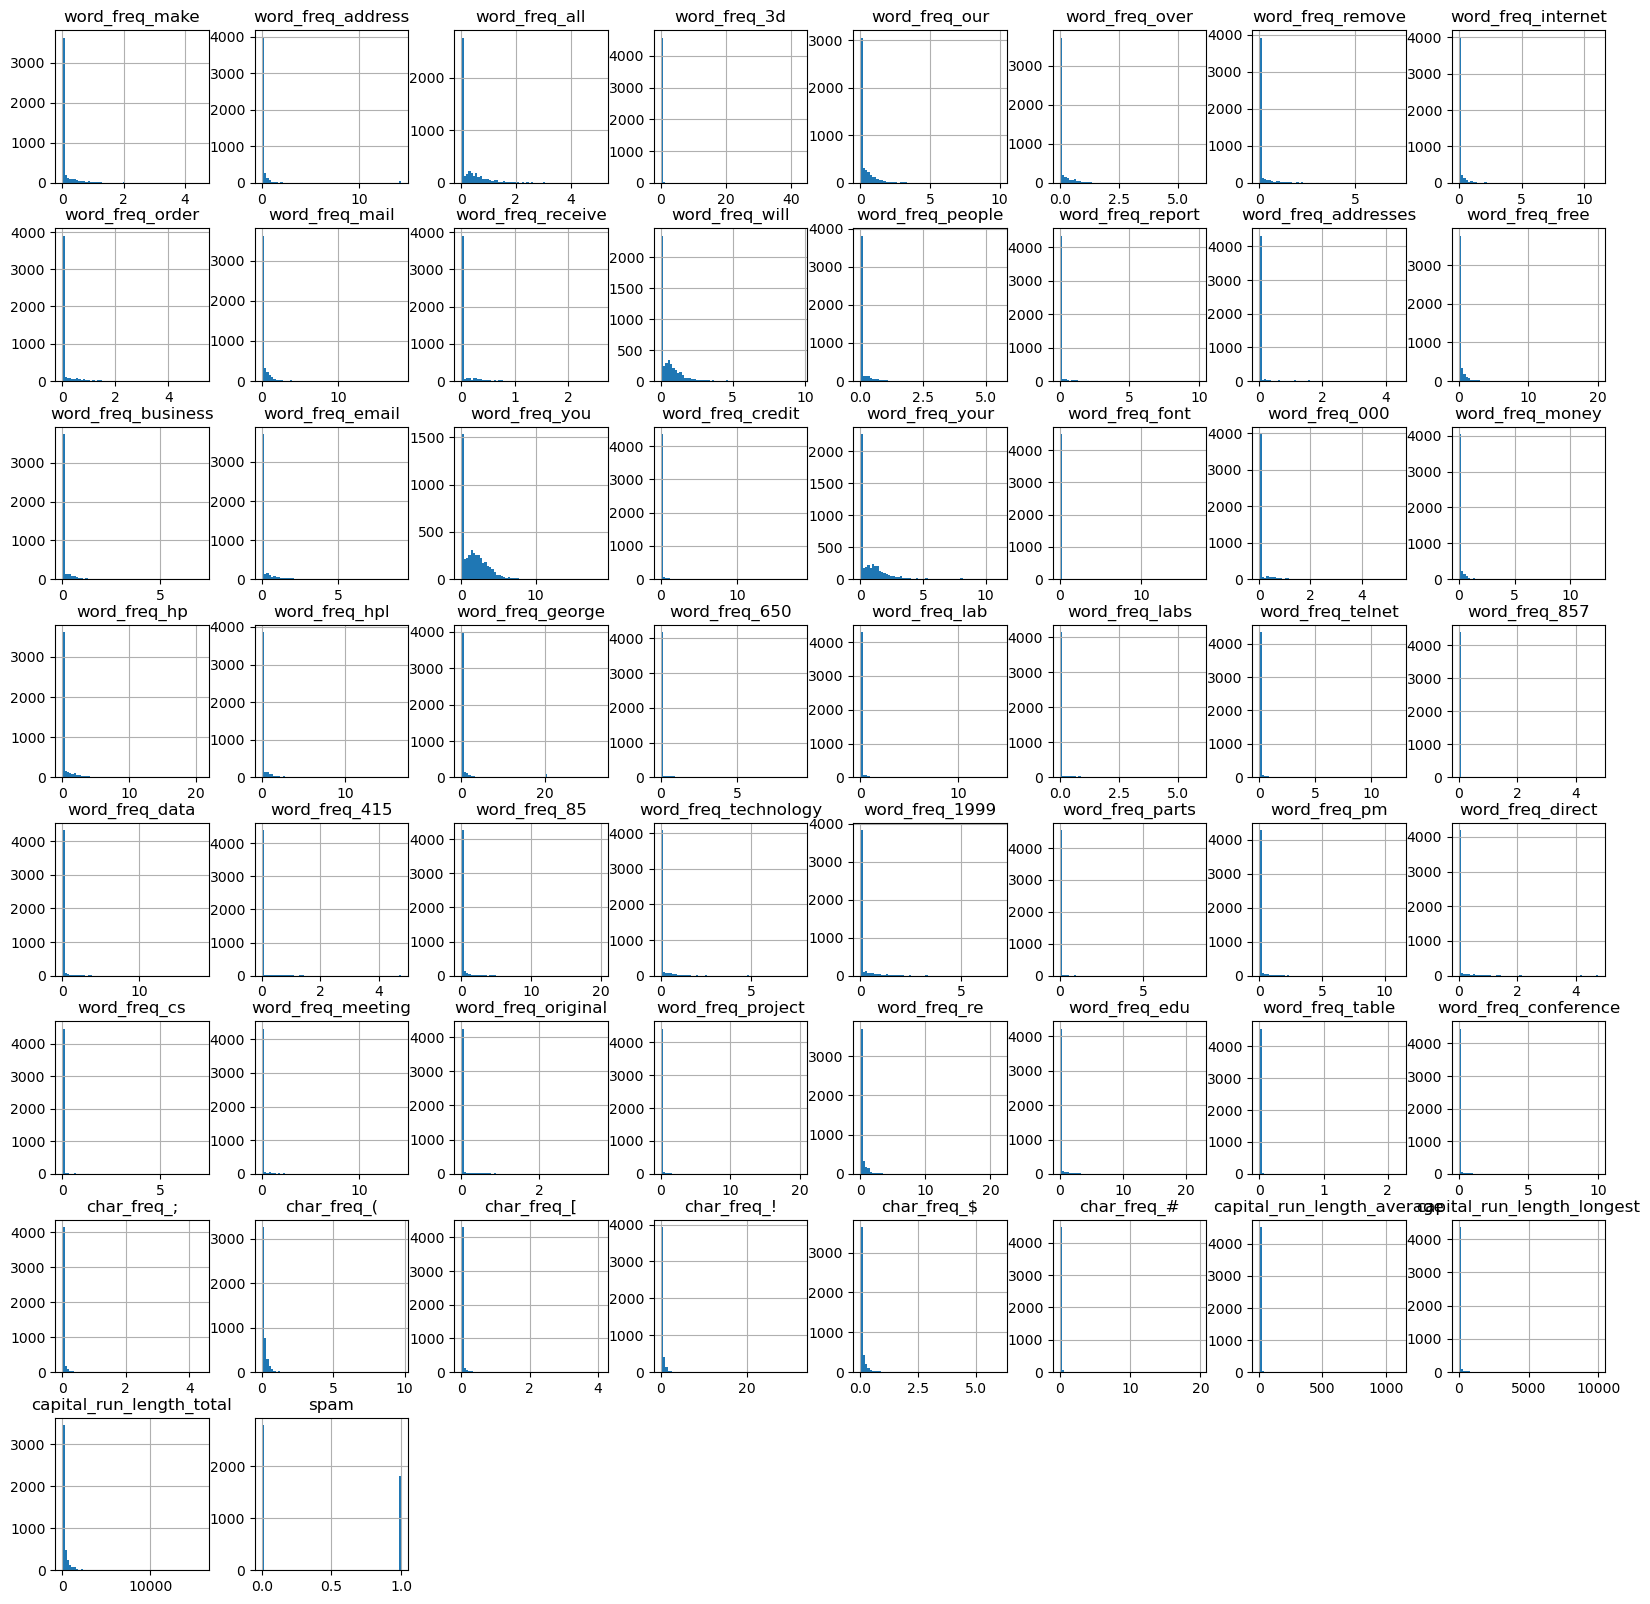

In [8]:
data.hist(bins=60, figsize=(20,20))

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [9]:
# Create the labels set `y` and features DataFrame `X`
X = data.drop(columns=['spam'])
y = data['spam']

In [10]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
data['spam'].value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [11]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [12]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

StandardScaler()

In [14]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [15]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train_scaled, y_train)

# Score the model
print(f'Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}')

Training Data Score: 0.9295652173913044
Testing Data Score: 0.9278887923544744


In [16]:
# Make and save testing predictions with the saved logistic regression model using the test data

testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Review the predictions
results_df = pd.DataFrame({'Prediction': testing_predictions, 'Actua': y_test})
results_df


,Prediction,Actua
1351,0,1
1687,0,1
1297,1,1
2101,0,0
3920,0,0
...,...,...
1089,1,1
929,1,1
1545,0,1
4356,0,0


In [17]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset

print(f'Accuracy Score: {accuracy_score(y_test, testing_predictions)}')


Accuracy Score: 0.9278887923544744


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [18]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')


Training Score: 0.9997101449275362
Testing Score: 0.9652476107732406


In [19]:
# Make and save testing predictions with the saved logistic regression model using the test data

predictions = rf_model.predict(X_test_scaled)

# Review the predictions

predictions

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [20]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
acc_score = accuracy_score(y_test, predictions)
print(f'Accuracy Score : {acc_score}')

Accuracy Score : 0.9652476107732406


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

In [29]:
print(f'Logistic Regression model Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train):.3f}')
print(f'Logistic Regression model Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test):.3f}')
print(f'Logistic Regression model Accuracy Score: {accuracy_score(y_test, testing_predictions):.3f}')


print(f'Random Forest model Training Score: {rf_model.score(X_train_scaled, y_train):.3f}')
print(f'Random Forest model Testing Score: {rf_model.score(X_test_scaled, y_test):.3f}')
print(f'Random Forest model Accuracy Score : {acc_score:.3f}')

Logistic Regression model Training Data Score: 0.930
Logistic Regression model Testing Data Score: 0.928
Logistic Regression model Accuracy Score: 0.928
Random Forest model Training Score: 1.000
Random Forest model Testing Score: 0.965
Random Forest model Accuracy Score : 0.965


In [ ]:
# Random forest appears to have the edge over the logisitic regression model but the perfect 1 for the training
# score makes me think it may be over fit.